# Big mart Data Analysis.

### Big Data Mart Sales Problem
#### Problem Statement:
>The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

>Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


Importing the required library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

lets import our data and see what we have.

In [2]:
df = pd.read_csv("bigmart_train.csv")

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### EDA

Lets start our pipeline in identifing nul values and droping the columns that wont help us in prediction.


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We have two column with missing values 
1. Item_Weight --> Continous column
2. Outlet_Size --> Categorical Coloumn.

Lets fill the NaN values by seeing the corelation of the variable but before which lets analysise the data further.

In [6]:
collist = df.columns.values

for i in collist:
    print(f"the unique value of {i} is \n {df[i].unique()}\n")

the unique value of Item_Identifier is 
 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

the unique value of Item_Weight is 
 [ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.

### Key observation:

    1. Catogorical data:
        1. Item_Identifier
        2. Item_Fat_Content --> 
        ['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] here (low fat= Low Fat =LF) and (Regular = reg)
        3. Item_Type
        4. Outlet_Identifier
        5. Outlet_Establishment_Year
        6. Outlet_Size
        7. Outlet_Location_Type
        8. Outlet_Type
        
    2. Continous Data:
        1. Item_Weight
        2. Item_Visibility
        3. Item_MRP
        4. Item_Outlet_Sales

In [7]:
df.Item_Fat_Content.replace("low fat", "LF", inplace = True)
df.Item_Fat_Content.replace("Low Fat", "LF", inplace = True)
df.Item_Fat_Content.replace("Regular", "reg", inplace = True)
df.Item_Fat_Content.unique()

array(['LF', 'reg'], dtype=object)

In [8]:
cols = df.columns
num_cols = df._get_numeric_data().columns

non_numeric_cols = list(set(cols)-set(num_cols))
non_numeric_cols

['Item_Type',
 'Item_Identifier',
 'Outlet_Size',
 'Item_Fat_Content',
 'Outlet_Location_Type',
 'Outlet_Identifier',
 'Outlet_Type']

### Encoding the non numeric data with lable encoder:

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
c = ['Outlet_Identifier','Item_Fat_Content',
  'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Identifier',
 'Item_Type']
for i in c:
    df[i] = le.fit_transform(df[i])
    
df    

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,NaN,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,High,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,High,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,NaN,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,Small,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,Medium,2,2,1845.5976


In [10]:
df.Outlet_Size.replace("Small",0,inplace = True)
df.Outlet_Size.replace("Medium",1,inplace = True)
df.Outlet_Size.replace("High",2,inplace = True)
df.Outlet_Size.astype(float)
df.Outlet_Size.unique()

array([ 1., nan,  2.,  0.])

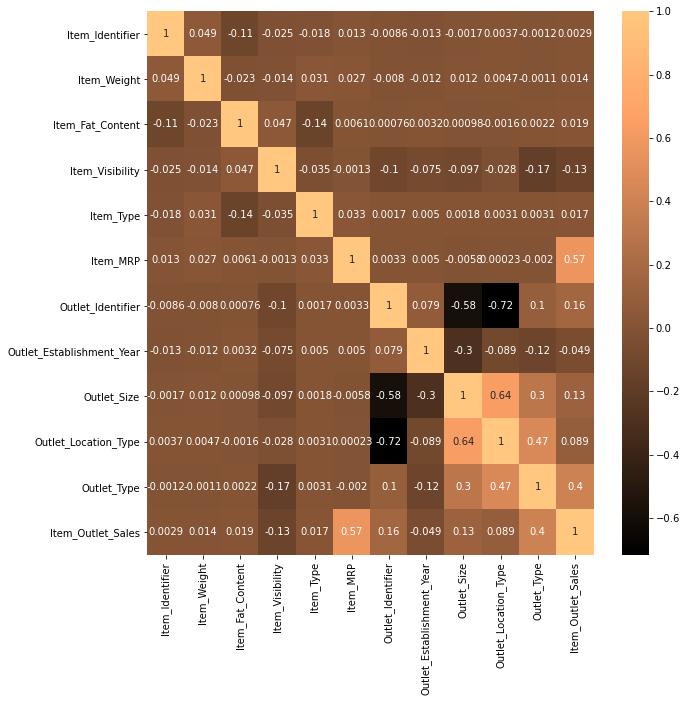

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap= "copper")
plt.show()

### Key observation:
    1. Outlet_Size has highest correlation with Outlet_Location_Type.
    2. item_weight has highest correlation with iteam_identifier and iteam_Fat_Content.
    
  Lets Fill the NaN values of the both by spliting the data.  

In [12]:
list= []

for i in df.Outlet_Location_Type.unique():
    list.append(i)

for i in range(0,len(list)):
    exec(f'OLT_{i} = df.loc[df.Outlet_Location_Type=={list[i]}]')
    exec(f"OLT_{i}.Outlet_Size.fillna(OLT_{i}['Outlet_Size'].mode()[0], inplace = True)")

DF = pd.concat([OLT_0,OLT_1,OLT_2])
df= DF.sort_index()

In [13]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
list= []

for i in df.Item_Fat_Content.unique():
    list.append(i)
    
for i in range(0,len(list)):
    exec(f'IFC_{i} = df.loc[df.Item_Fat_Content=={list[i]}]')
    exec(f"IFC_{i}.Item_Weight.fillna(IFC_{i}['Item_Weight'].median(), inplace = True)")

DF = pd.concat([IFC_0,IFC_1])
df= DF.sort_index()

In [15]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### We have Removed the null values from our data set lets see the summary of the data.

In [16]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.812991,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,0.611522,1.112871,1.201220,2181.288914
std,449.222377,4.227366,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.675514,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,0.000000,0.000000,1.000000,834.247400
50%,783.000000,12.650000,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,1.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


### Key observation:
    Continous Data:
    1. Item_Weight
    2. Item_Visibility
    3. Item_MRP
    4. Item_Outlet_Sales
 All have the mean greater than the median and 75th percentile aand max have huge gap. this identified the outliers present in the data and  skewness present in the data.
    

### Lets see the Correlation of all the Feature_variable with Target_Variable:

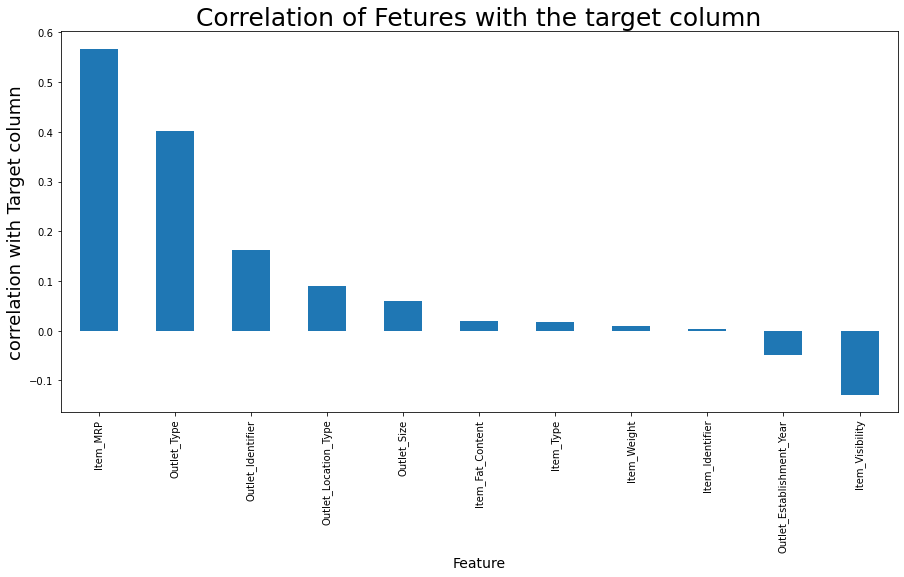

In [17]:
plt.figure(figsize=(15,7))
df.corr()["Item_Outlet_Sales"].sort_values(ascending=False).drop(["Item_Outlet_Sales"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()
cor=pd.DataFrame(df.corr()["Item_Outlet_Sales"].sort_values(ascending=False)).drop(["Item_Outlet_Sales"])

In [18]:
print("Key observation:\n", cor)

Key observation:
                            Item_Outlet_Sales
Item_MRP                            0.567574
Outlet_Type                         0.401522
Outlet_Identifier                   0.162325
Outlet_Location_Type                0.089367
Outlet_Size                         0.060517
Item_Fat_Content                    0.018719
Item_Type                           0.017048
Item_Weight                         0.009574
Item_Identifier                     0.002869
Outlet_Establishment_Year          -0.049135
Item_Visibility                    -0.128625


#### Item_MRP, Outlet_Type have higher correlation which means that the sales will be good if the outlet is bigger which is logically also true.

### Lets Identify the Skewness in the data By Univariate analysis.

In [19]:
agro1="#07fa60"
agro2="#78fcac"
agro3="#8cc894"
agro4="#345434"
agro5="#067528"

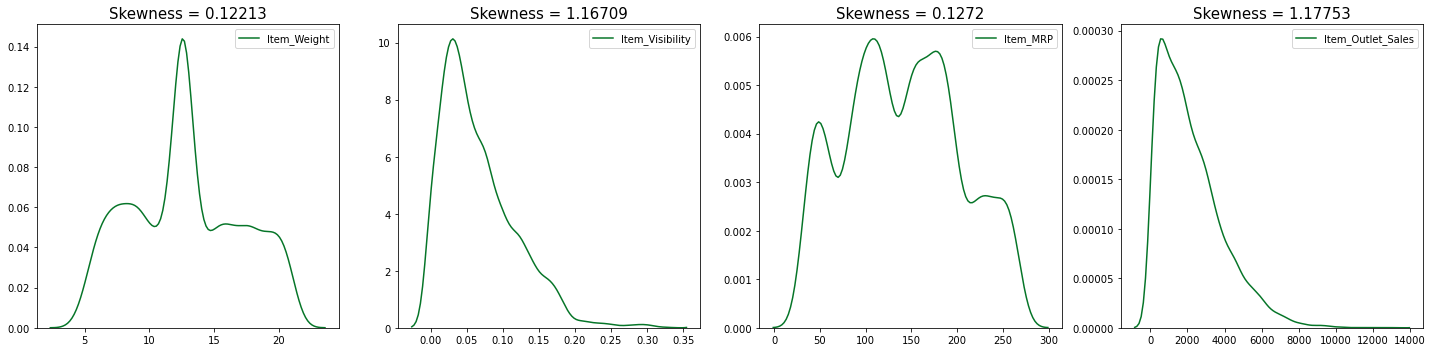

In [20]:
plt.figure(figsize=(20,5))
collist = ["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"]
for i in range (0, len(collist)):
    plt.subplot(1,4,i+1)         
    sns.kdeplot(df[collist[i]], color = agro5)
    plt.title(f"Skewness = {round(df[collist[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

We have two column that has skewness greater than 1.1 we will use yeo-johnson method to correct skewness in the data.

BELOW GRAPH WILL SHOW THE SKEWNESS OF THE DATA


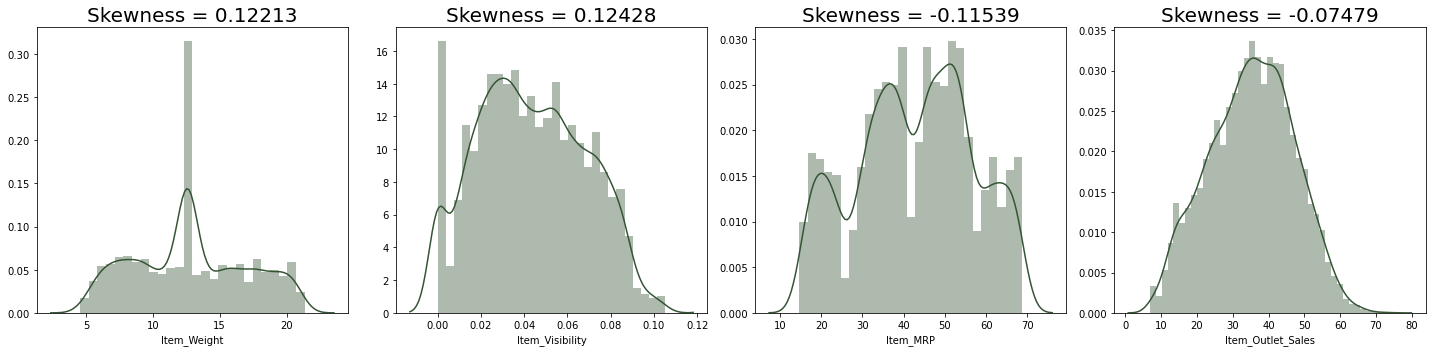

In [21]:
DF=df

from scipy.stats import yeojohnson

skew = ["Item_Visibility","Item_MRP","Item_Outlet_Sales"] 

for i in skew:
    DF[i]= yeojohnson(DF[i])[0]
    
print("BELOW GRAPH WILL SHOW THE SKEWNESS OF THE DATA")
plt.figure(figsize=(20,5))
for i in range (0, len(collist)):
    plt.subplot(1,4,i+1)
    plt.title(f"Skewness = {round(DF[collist[i]].skew(),5)}",fontsize=20)         
    sns.distplot(DF[collist[i]], color = agro4)
    plt.tight_layout() 

### Lets Identify the outliers and remove them.


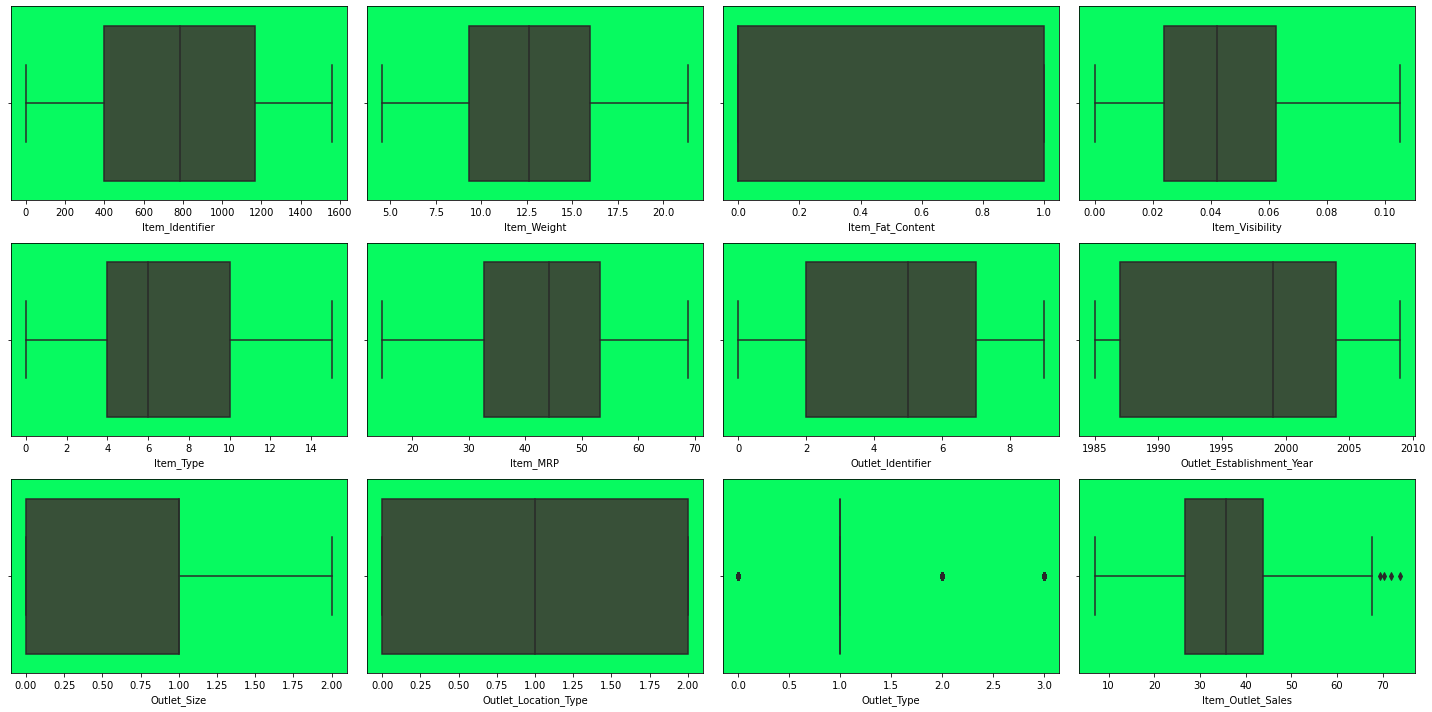

In [22]:
plt.figure(figsize=(20,10))
collist = DF.columns.values
for i in range (0, len(collist)):
    plt.subplot(3,4,i+1)
    ax=sns.boxplot(DF[collist[i]], color = agro4 , orient = "h")
    ax.set_facecolor(agro1)
    plt.tight_layout()

### The above observation Identifies there are outliers present in the dataset lets figure out how to remove them

Z-Score method
 

In [23]:
from scipy.stats import zscore

z= np.abs(zscore(DF))
threshold= 3
df_new = DF[(z < 3).all(axis=1)]

In [24]:
print(f"Orginal Data {DF.shape}\nAfter Removing outliers {df_new.shape}\nThe percentage of data loss {((8523-8521)/8523)*100}%")

Orginal Data (8523, 12)
After Removing outliers (8521, 12)
The percentage of data loss 0.02346591575736243%


The loss of data is very minimal so we can remove the outliers


In [25]:
df= df_new

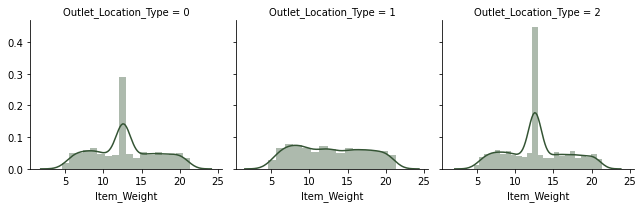

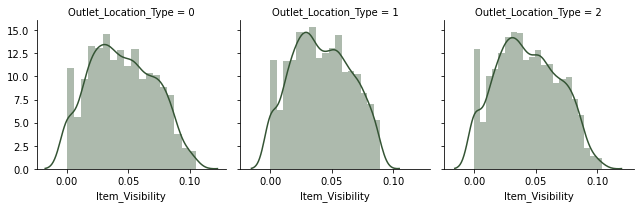

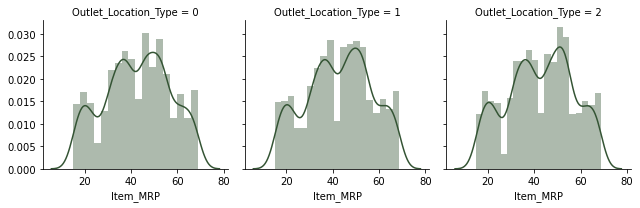

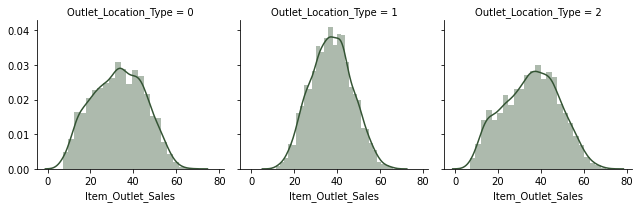

In [26]:
feature_var = ["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"]

for i in feature_var:
    facet= sns.FacetGrid(df,col="Outlet_Location_Type")
    facet.map(sns.distplot,i,color = agro4)
    plt.show()

### Key Observation:
    1. In outlet location type 2 the Iteam Weight has increased 
    2. No change in MRP since it was decided earlier before comming to outlet
    3. Outlet sales increased in Outlet location type 2

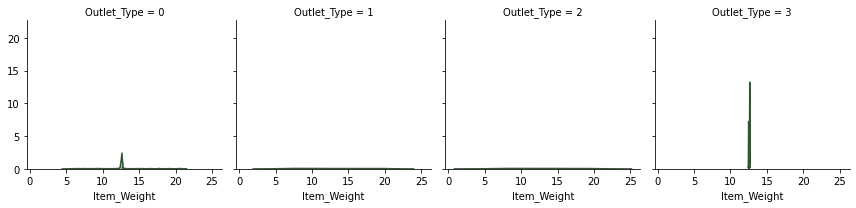

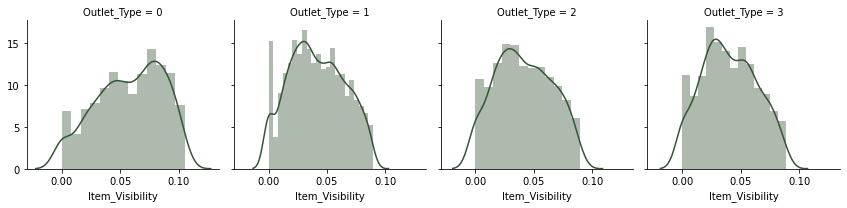

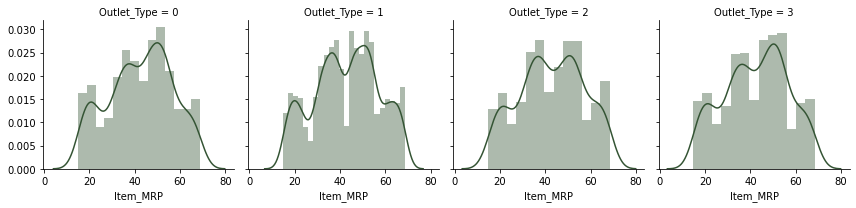

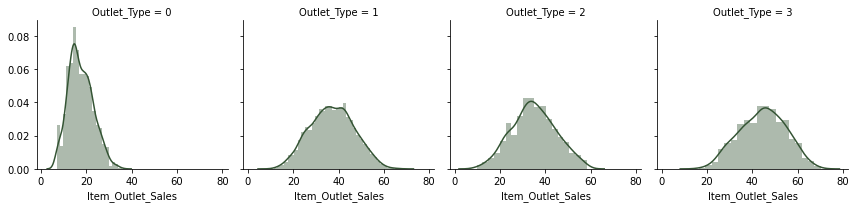

In [27]:
feature_var = ["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"]

for i in feature_var:
    facet= sns.FacetGrid(df,col="Outlet_Type")
    facet.map(sns.distplot,i,color = agro4)
    plt.show()

### Key Observation:

1. In outlet type 3 the Iteam Weight has increased 
2. No change in MRP since it was decided earlier before comming to outlet
3. Outlet sales increased in Outlet type 3

#### The above two observations proves that the sales depends more on area and size of the outlet.

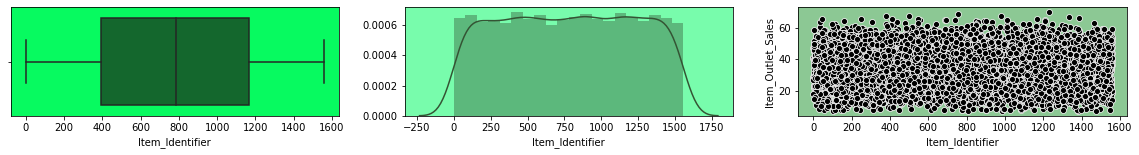

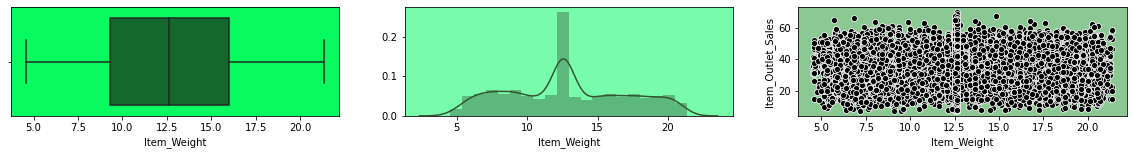

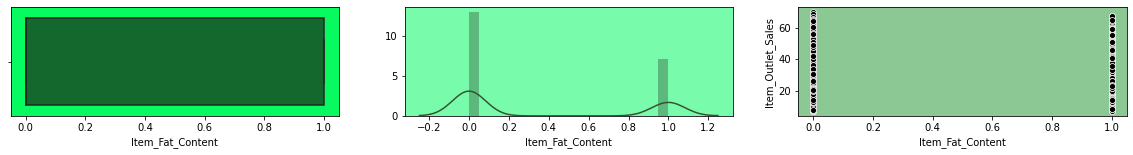

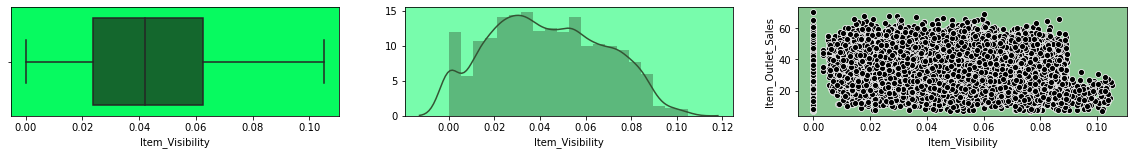

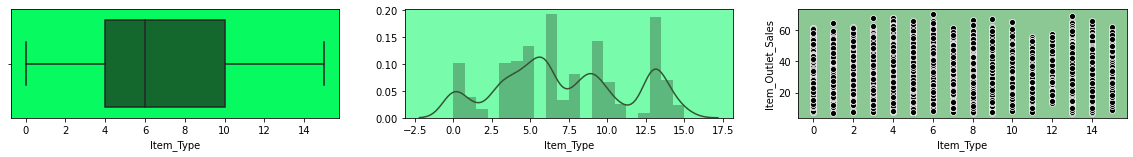

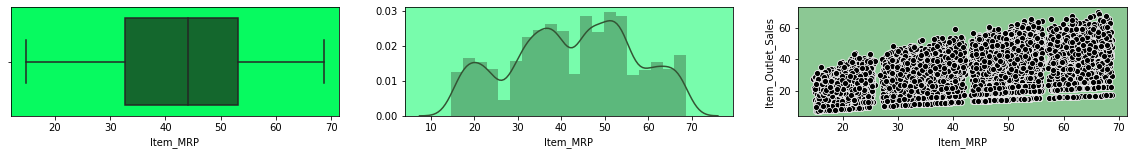

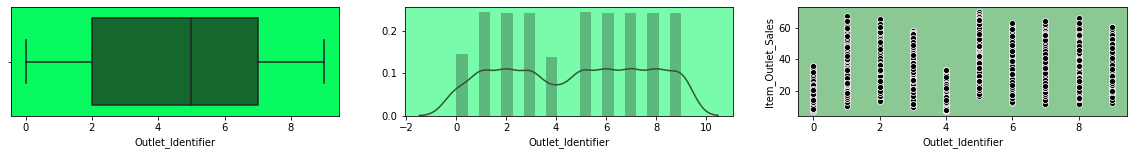

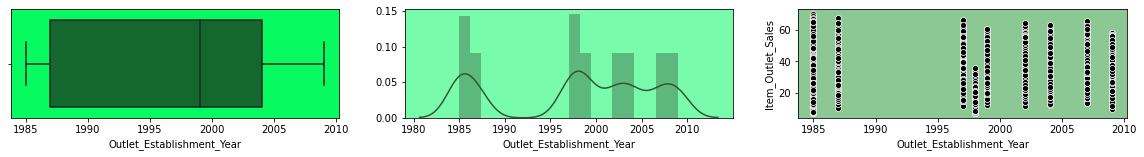

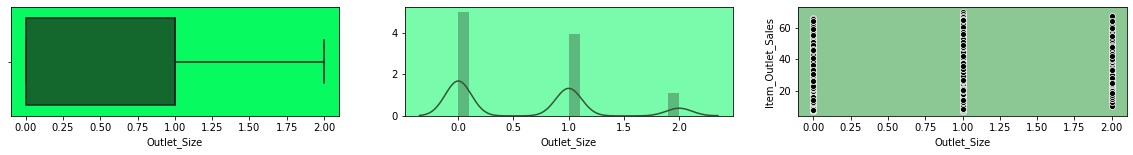

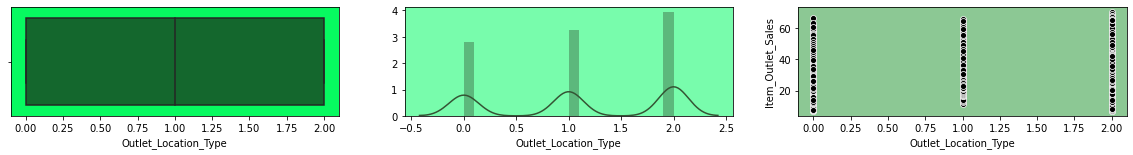

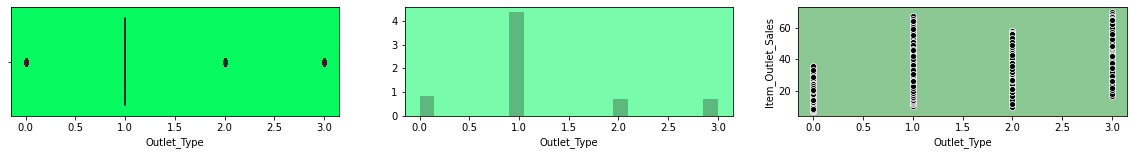

In [28]:
target_variable = 'Item_Outlet_Sales'
feature_variable = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', ]


def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(20, 2))
    a1=sns.boxplot(x=df[feature_name], ax=axs[0], color=agro5)
    a1.set_facecolor(agro1)
    a2=sns.distplot(df[feature_name], bins=20, kde=True, ax=axs[1],color=agro4)
    a2.set_facecolor(agro2)
    a3=sns.scatterplot(data=df, x=feature_name, y=target_variable, ax=axs[2], color="k")
    a3.set_facecolor(agro3)
    plt.show()
    
for i in feature_variable:
    num_plots(i) 

### Key observation:
    The above data proved that as per corelation the spread of the data points in the Graph. 
    MRP had very high corelation with Sales since the scattered of the data points are very low.

### Scaling all the continuous variable before shortlisting model.

In [29]:
 from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
df[["Item_Weight","Item_Visibility","Item_MRP"]] = sc.fit_transform(df[["Item_Weight","Item_Visibility","Item_MRP"]])
    

>We have scaled our data for training our model lets split our data into feature variables and target variables

In [30]:
x_1=df.drop(["Item_Outlet_Sales"], axis = 1)
y_1=df.Item_Outlet_Sales

### Selecting parameters for training

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,1000):
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train_1,y_train_1)
    y_pred_1 = mod.predict(x_test_1)
    tempacc = r2_score(y_test_1,y_pred_1)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 60.02134519761524 found on randomstate 637


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = best_rstate)

In [33]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

### Shortlisting the best model


In [34]:
models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=42), RandomForestRegressor(random_state=42)]

model_names = ["LinearRegression", "Lasso", "Ridge", "ElasticNet", "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "AdaBoostRegressor", "RandomForestRegressor"]

In [35]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]

for m in models:
    m.fit(x_train_1,y_train_1)
    print("Score of", m, "is:", m.score(x_train_1,y_train_1))
    score.append(m.score(x_train_1,y_train_1))
    predm=m.predict(x_test_1)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test_1,predm))
    mean_abs_e.append(mean_absolute_error(y_test_1,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test_1,predm))
    mean_sqr_e.append(mean_squared_error(y_test_1,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test_1,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test_1,predm)))
    print("R2 SCORE: ", r2_score(y_test_1,predm))
    r2.append(r2_score(y_test_1,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.5683793837562825

ERROR:
MEAN ABSOLUTE ERROR:  6.322555040481148
MEAN SQUARED ERROR:  62.25719012072514
ROOT MEAN SQUARED ERROR : 7.890322561259783
R2 SCORE:  0.5612949472087058
**********************************************************************************************************



Score of Lasso() is: 0.5407851518528748

ERROR:
MEAN ABSOLUTE ERROR:  6.599126298519996
MEAN SQUARED ERROR:  66.39018895712144
ROOT MEAN SQUARED ERROR : 8.148017486304349
R2 SCORE:  0.5321711228087993
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.5683793179875709

ERROR:
MEAN ABSOLUTE ERROR:  6.322612446377345
MEAN SQUARED ERROR:  62.25685176360021
ROOT MEAN SQUARED ERROR : 7.89030111995735
R2 SCORE:  0.5612973314952447
**********************************************************************************************************



Score of ElasticNet() is: 0.46925

In [36]:
mean_score=[]
STD=[]
for m in models:
    CV=cross_val_score(m,x_1,y_1,cv=5,scoring="r2")
    print("SCORE OF",m,"IS:")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS:
SCORE IS: [0.57685323 0.57816158 0.54315892 0.55490195 0.5715957 ]
MEAN OF SCORE is : 0.5649342752418749
Standard Deviation : 0.013683647891073167
**************************************************************************************************



SCORE OF Lasso() IS:
SCORE IS: [0.54487412 0.54859521 0.52896924 0.52851739 0.54207166]
MEAN OF SCORE is : 0.5386055231610228
Standard Deviation : 0.008315428286159129
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS:
SCORE IS: [0.57684585 0.57815276 0.5431669  0.55490429 0.571604  ]
MEAN OF SCORE is : 0.5649347594246017
Standard Deviation : 0.013678585165037954
**************************************************************************************************



SCORE OF ElasticNet() IS:
SCORE IS: [0.47044777 0.47709488 0.46345804 0.45468553 0.47144259]
MEAN OF SCORE is : 0.46742575959808735
Standard Deviation : 0.

In [37]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": mean_score,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="SCORE", ascending=False)

,MODEL,SCORE,CV_mean_score,CV_STD,MBE,MSE,RMSE,R2
6,DecisionTreeRegressor,1.000000,0.361508,0.027762,7.307423,89.836979,9.478237,0.366950
8,RandomForestRegressor,0.952807,0.655435,0.009596,5.328979,48.035919,6.930795,0.661507
7,AdaBoostRegressor,0.668813,0.659970,0.008296,5.382858,46.751656,6.837518,0.670557
0,LinearRegression,0.568379,0.564934,0.013684,6.322555,62.257190,7.890323,0.561295
2,Ridge,0.568379,0.564935,0.013679,6.322612,62.256852,7.890301,0.561297
1,Lasso,0.540785,0.538606,0.008315,6.599126,66.390189,8.148017,0.532171
3,ElasticNet,0.469251,0.467426,0.007705,7.182393,76.142001,8.725938,0.463453
5,KNeighborsRegressor,0.435750,0.133779,0.007737,8.881414,124.276288,11.147928,0.124268
4,SVR,-0.001343,-0.003185,0.003366,9.783434,142.340200,11.930641,-0.003023


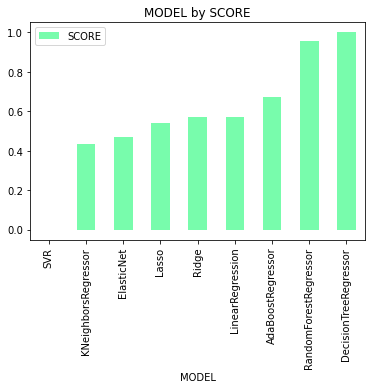

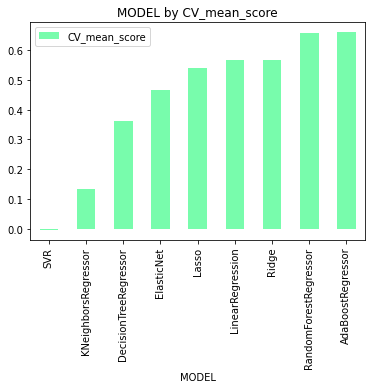

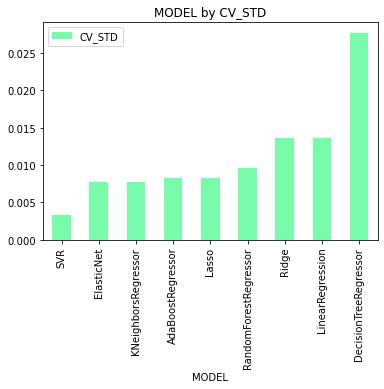

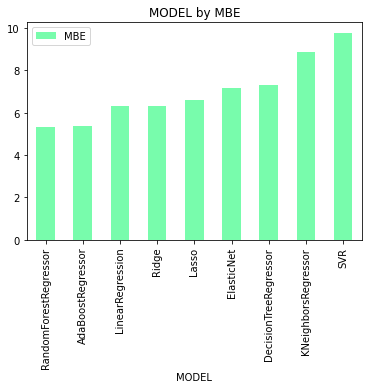

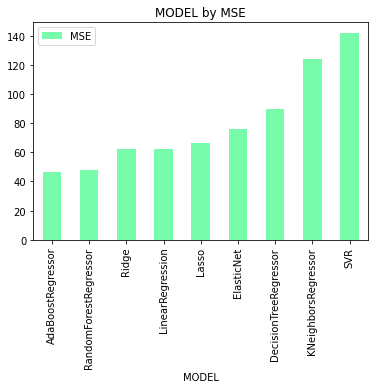

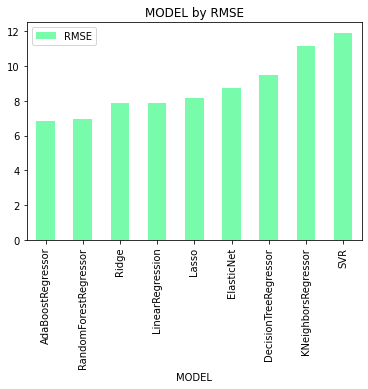

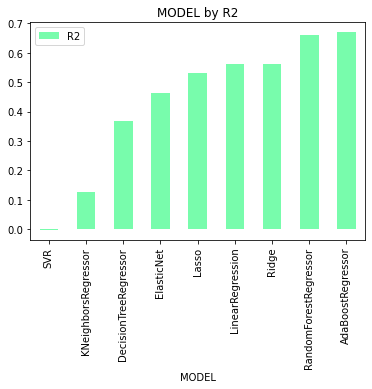

In [38]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = agro2)
    plt.title(f"MODEL by {metric}")
    plt.show()


We have Desicion tree model tops the chart with 100 % accuracy but we will take Random forest regressor whose CV score is higher and we will save it..

In [39]:
rf = RandomForestRegressor(random_state=42)
cross_val_predict(rf, x_train_1, y_train_1, cv=5, n_jobs=-1).mean()

35.202549431849164

In [40]:
rf.fit(x_train_1, y_train_1)

RandomForestRegressor(random_state=42)

In [41]:
rf.score(x_train_1, y_train_1)

0.9528074948558583

In [42]:
y_train_1

7090    20.793941
6013    19.969886
2987    49.362177
3517    29.401499
8458    21.089398
          ...    
8411    49.848519
7585     8.365786
8419    27.992930
5833    34.411451
481     43.441136
Name: Item_Outlet_Sales, Length: 6390, dtype: float64

we already have a score of 95% so we are saving model further without hypertuning

### Saving the final model

In [43]:
import joblib
joblib.dump(rf,"Outlet_Sales.obj")

['Outlet_Sales.obj']

lets predict on importing testing data

In [44]:
df1 = pd.read_csv("bigmart_test.csv")
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [45]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [46]:
df1.Item_Fat_Content.replace("low fat", "LF", inplace = True)
df1.Item_Fat_Content.replace("Low Fat", "LF", inplace = True)
df1.Item_Fat_Content.replace("Regular", "reg", inplace = True)
df1.Item_Fat_Content.unique()

array(['LF', 'reg'], dtype=object)

In [47]:
c = ['Outlet_Identifier','Item_Fat_Content',
  'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Identifier',
 'Item_Type']
for i in c:
    df1[i] = le.fit_transform(df1[i])
    
df1 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0,0.007565,13,107.8622,9,1999,Medium,0,1
1,1067,8.300,1,0.038428,4,87.3198,2,2007,NaN,1,1
2,1406,14.600,0,0.099575,11,241.7538,0,1998,NaN,2,0
3,809,7.315,0,0.015388,13,155.0340,2,2007,NaN,1,1
4,1184,NaN,1,0.118599,4,234.2300,5,1985,Medium,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500,1,0.013496,13,141.3154,8,1997,Small,0,1
5677,306,7.600,1,0.142991,15,169.1448,3,2009,Medium,2,2
5678,1412,10.000,0,0.073529,8,118.7440,7,2002,NaN,1,1
5679,517,15.300,1,0.000000,3,214.6218,2,2007,NaN,1,1


In [48]:
df1.Outlet_Size.replace("Small",0,inplace = True)
df1.Outlet_Size.replace("Medium",1,inplace = True)
df1.Outlet_Size.replace("High",2,inplace = True)
df1.Outlet_Size.astype(float)
df1.Outlet_Size.unique()

array([ 1., nan,  0.,  2.])

In [49]:
list= []

for i in df1.Outlet_Location_Type.unique():
    list.append(i)

for i in range(0,len(list)):
    exec(f'OLT_{i} = df1.loc[df1.Outlet_Location_Type=={list[i]}]')
    exec(f"OLT_{i}.Outlet_Size.fillna(OLT_{i}['Outlet_Size'].mode()[0], inplace = True)")

DF = pd.concat([OLT_0,OLT_1,OLT_2])
df1= DF.sort_index()

In [50]:
list= []

for i in df1.Item_Fat_Content.unique():
    list.append(i)
    
for i in range(0,len(list)):
    exec(f'IFC_{i} = df1.loc[df1.Item_Fat_Content=={list[i]}]')
    exec(f"IFC_{i}.Item_Weight.fillna(IFC_{i}['Item_Weight'].median(), inplace = True)")

DF = pd.concat([IFC_0,IFC_1])
df1= DF.sort_index()

In [51]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [52]:
skew = ["Item_Visibility","Item_MRP"] 

for i in skew:
    df1[i]= yeojohnson(df1[i])[0]

In [53]:
sc= StandardScaler()
df1[["Item_Weight","Item_Visibility","Item_MRP"]] = sc.fit_transform(df1[["Item_Weight","Item_Visibility","Item_MRP"]])
    

In [54]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,1.909178,0,-1.462069,13,-0.472017,9,1999,1.0,0,1
1,1067,-1.020083,1,-0.448019,4,-0.835998,2,2007,0.0,1,1
2,1406,0.462194,0,0.871342,11,1.525375,0,1998,1.0,2,0
3,809,-1.251836,0,-1.175927,13,0.290835,2,2007,0.0,1,1
4,1184,-0.196596,1,1.153823,4,1.424528,5,1985,1.0,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,-0.502463,1,-1.243150,13,0.077563,8,1997,0.0,0,1
5677,306,-1.184780,1,1.453584,15,0.504137,3,2009,1.0,2,2
5678,1412,-0.620104,0,0.397868,8,-0.288074,7,2002,0.0,1,1
5679,517,0.626891,1,-1.760234,3,1.156802,2,2007,0.0,1,1


In [55]:
Sales_model= joblib.load('Outlet_Sales.obj')
prediction = Sales_model.predict(df1)
prediction

array([33.88194339, 32.29063533, 25.79894189, ..., 35.51426392,
       48.53867621, 31.43461551])

In [56]:
Predicted_Iteam_Outlet_sales=pd.DataFrame({"Pred_Item_Outlet_Sales":prediction})
Predicted_Iteam_Outlet_sales

,Pred_Item_Outlet_Sales
0,33.881943
1,32.290635
2,25.798942
3,37.547903
4,50.285810
...,...
5676,41.461316
5677,40.632547
5678,35.514264
5679,48.538676


In [57]:
Predicted_Iteam_Outlet_sales.to_csv(" Predicted_Iteam_Outlet_sales.csv")

### Conclusion:
>From the above study one can understand the prediction and forecast of Outlet sales
    >>What are all the factors including location size of outlet helps in increasing the sales